# Southpark EDA

## Setup

In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from rich.console import Console
from textblob import TextBlob

In [2]:
df_lines = pd.read_csv("data/sp_lines.csv")
df_ratings = pd.read_csv("data/sp_ratings.csv")

## EDA

In [3]:
def top_n_rated(df, n):
    return df.sort_values(by="rating", ascending=False).iloc[0:n, :]


def get_lines_by_season_and_episode(df, season_num, episode_num):
    return df.loc[
        (df["season_number"] == season_num) & (df["episode_number"] == episode_num)
    ].iloc[1:-1, :]


def plot_lines_per_character(character_series, title=None):
    fig = px.bar(character_series)
    fig.update_layout(
        showlegend=False, xaxis_title="character", yaxis_title="line count", title=title
    )
    return fig


def ratings_and_lines(df, df_lines):
    return df.merge(df_lines, how="inner", on=["season_number", "episode_number"])


def make_blob(df):
    return TextBlob(". ".join(df["text"].dropna().to_numpy()))


def make_all_blobs(df, df_lines):
    blobs = {}
    for tups in df.itertuples():
        df_temp = get_lines_by_season_and_episode(
            df_lines, tups.season_number, tups.episode_number
        )

        blobs[tups.episode_name] = make_blob(df_temp)

    return blobs

In [4]:
top_n = top_n_rated(df_ratings, 100)

In [5]:
df_rl = ratings_and_lines(top_n, df_lines)

In [6]:
top_ten_blobs = make_all_blobs(df_rl, df_lines)

In [7]:
token = nltk.PunktSentenceTokenizer()

In [8]:
txt = str(top_ten_blobs['AWESOM-O'])

In [10]:
from nltk.corpus import wordnet as wn

In [11]:
wn.synsets(txt)

[]

In [12]:
wn.synsets('hi')

[Synset('hello.n.01'), Synset('hawaii.n.01')]

In [13]:
words = nltk.word_tokenize(txt)

In [23]:
wn.synsets(words[34])

[Synset('angstrom.n.01'),
 Synset('vitamin_a.n.01'),
 Synset('deoxyadenosine_monophosphate.n.01'),
 Synset('adenine.n.01'),
 Synset('ampere.n.02'),
 Synset('a.n.06'),
 Synset('a.n.07')]

In [24]:
wn.synset('angstrom.n.01').definition()

'a metric unit of length equal to one ten billionth of a meter (or 0.0001 micron); used to specify wavelengths of electromagnetic radiation'

In [25]:
words[34]

'a'

In [41]:
wn.synsets(words[483])

[]

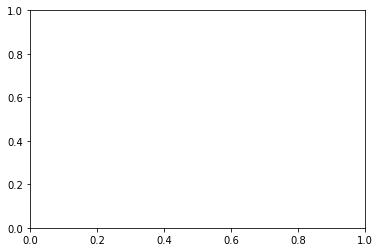

<AxesSubplot:>

In [47]:
nltk.ConditionalFreqDist().plot()